In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cheeses.csv')

In [3]:
df.head()

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
0,Aarewasser,https://www.cheese.com/aarewasser/,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi
1,Abbaye de Belloc,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN
2,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN
3,Abbaye de Citeaux,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN
4,Abbaye de Tamié,https://www.cheese.com/tamie/,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN


In [4]:
df.drop('url',axis=1,inplace=True)

In [5]:
df.head()

,cheese,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
0,Aarewasser,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi
1,Abbaye de Belloc,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN
2,Abbaye de Belval,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN
3,Abbaye de Citeaux,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN
4,Abbaye de Tamié,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cheese           1187 non-null   object
 1   milk             1151 non-null   object
 2   country          1176 non-null   object
 3   region           855 non-null    object
 4   family           489 non-null    object
 5   type             1174 non-null   object
 6   fat_content      248 non-null    object
 7   calcium_content  25 non-null     object
 8   texture          1129 non-null   object
 9   rind             945 non-null    object
 10  color            1045 non-null   object
 11  flavor           1089 non-null   object
 12  aroma            929 non-null    object
 13  vegetarian       748 non-null    object
 14  vegan            748 non-null    object
 15  synonyms         294 non-null    object
 16  alt_spellings    109 non-null    object
 17  producers        787 non-null    

In [7]:
df['milk'].value_counts()

milk
cow                                696
goat                               195
sheep                              128
cow, goat                           25
cow, goat, sheep                    21
goat, sheep                         21
cow, sheep                          21
water buffalo                       14
plant-based                          6
buffalo, cow                         5
buffalo                              4
cow, water buffalo                   3
cow, goat, water buffalo             2
yak                                  2
cow, goat, sheep, water buffalo      2
camel                                1
cow, yak                             1
buffalo, cow, sheep                  1
moose                                1
donkey                               1
goat, yak                            1
Name: count, dtype: int64

In [8]:
df.nunique()

cheese             1187
milk                 21
country              82
region              349
family               21
type                 84
fat_content          85
calcium_content      24
texture             309
rind                 12
color                17
flavor              626
aroma               330
vegetarian            2
vegan                 2
synonyms            292
alt_spellings       109
producers           318
dtype: int64

In [9]:
df.describe(include='all')

,cheese,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
count,1187,1151,1176,855,489,1174,248,25,1129,945,1045,1089,929,748,748,294,109,787
unique,1187,21,82,349,21,84,85,24,309,12,17,626,330,2,2,292,109,318
top,Aarewasser,cow,United States,Wisconsin,Blue,"semi-hard, artisan",45%,492 mg/100g,creamy,natural,white,creamy,rich,False,False,Rupp Vorarlberger Bergkäse,"Tamié, Trappiste de Tamie, Abbey of Tamie",Sartori
freq,1,696,305,67,94,133,50,2,162,439,281,34,56,386,742,3,1,27


In [10]:
df.isnull().sum()

cheese                0
milk                 36
country              11
region              332
family              698
type                 13
fat_content         939
calcium_content    1162
texture              58
rind                242
color               142
flavor               98
aroma               258
vegetarian          439
vegan               439
synonyms            893
alt_spellings      1078
producers           400
dtype: int64

In [11]:
df.duplicated().sum()

0

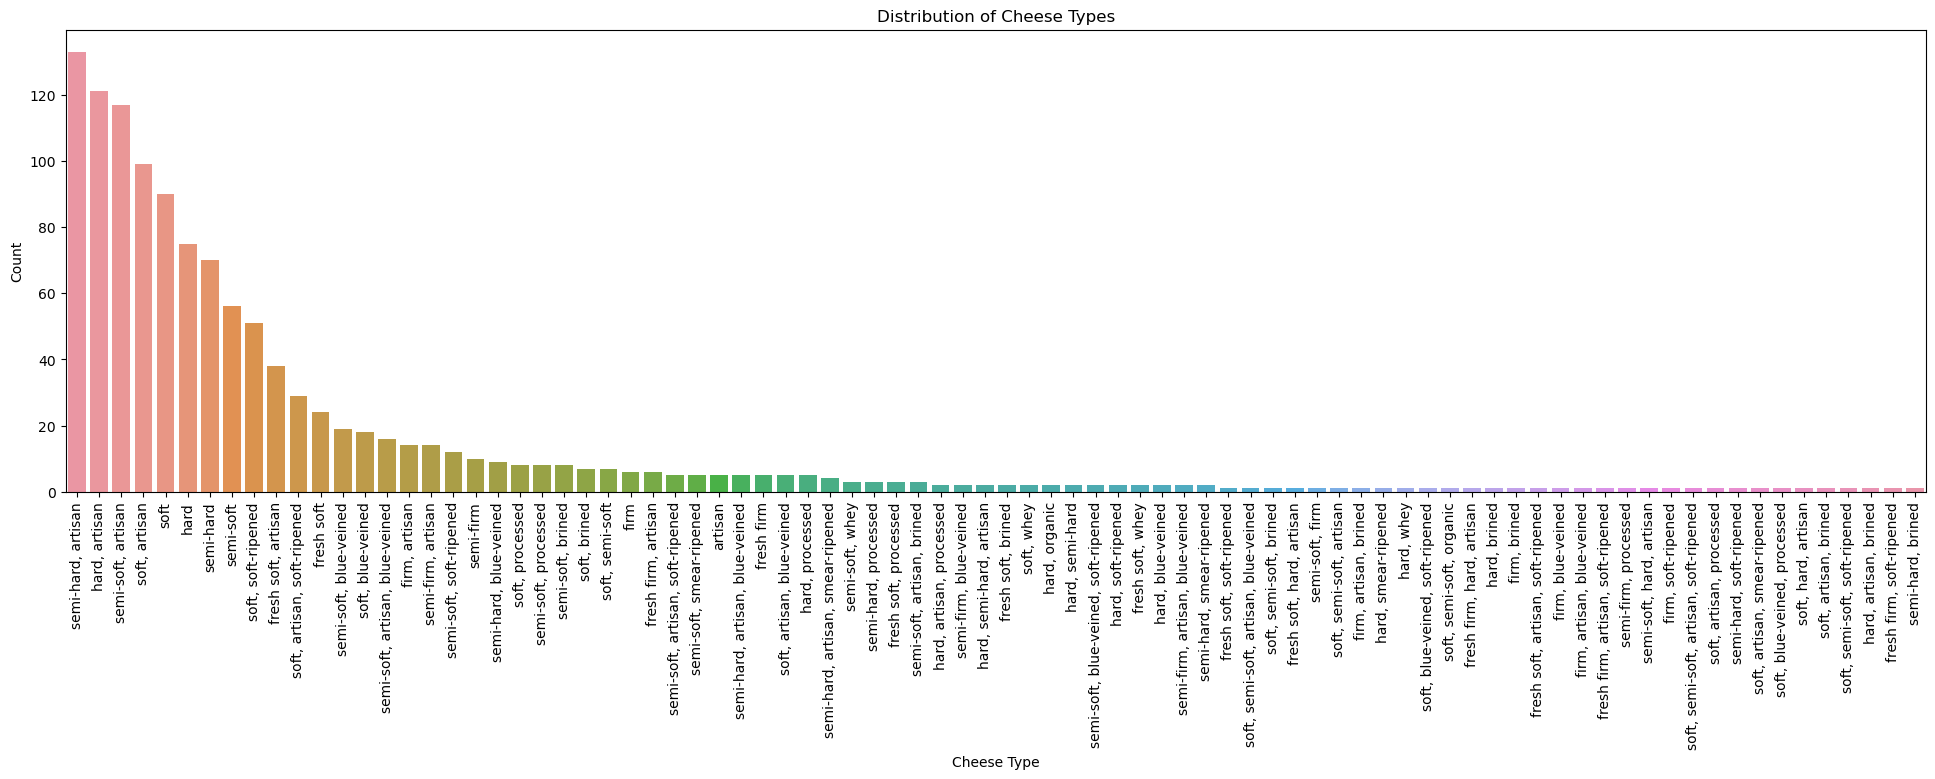

In [12]:
#Visualizing Cheese Type Distributions

plt.figure(figsize=(24, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Distribution of Cheese Types')
plt.xlabel('Cheese Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

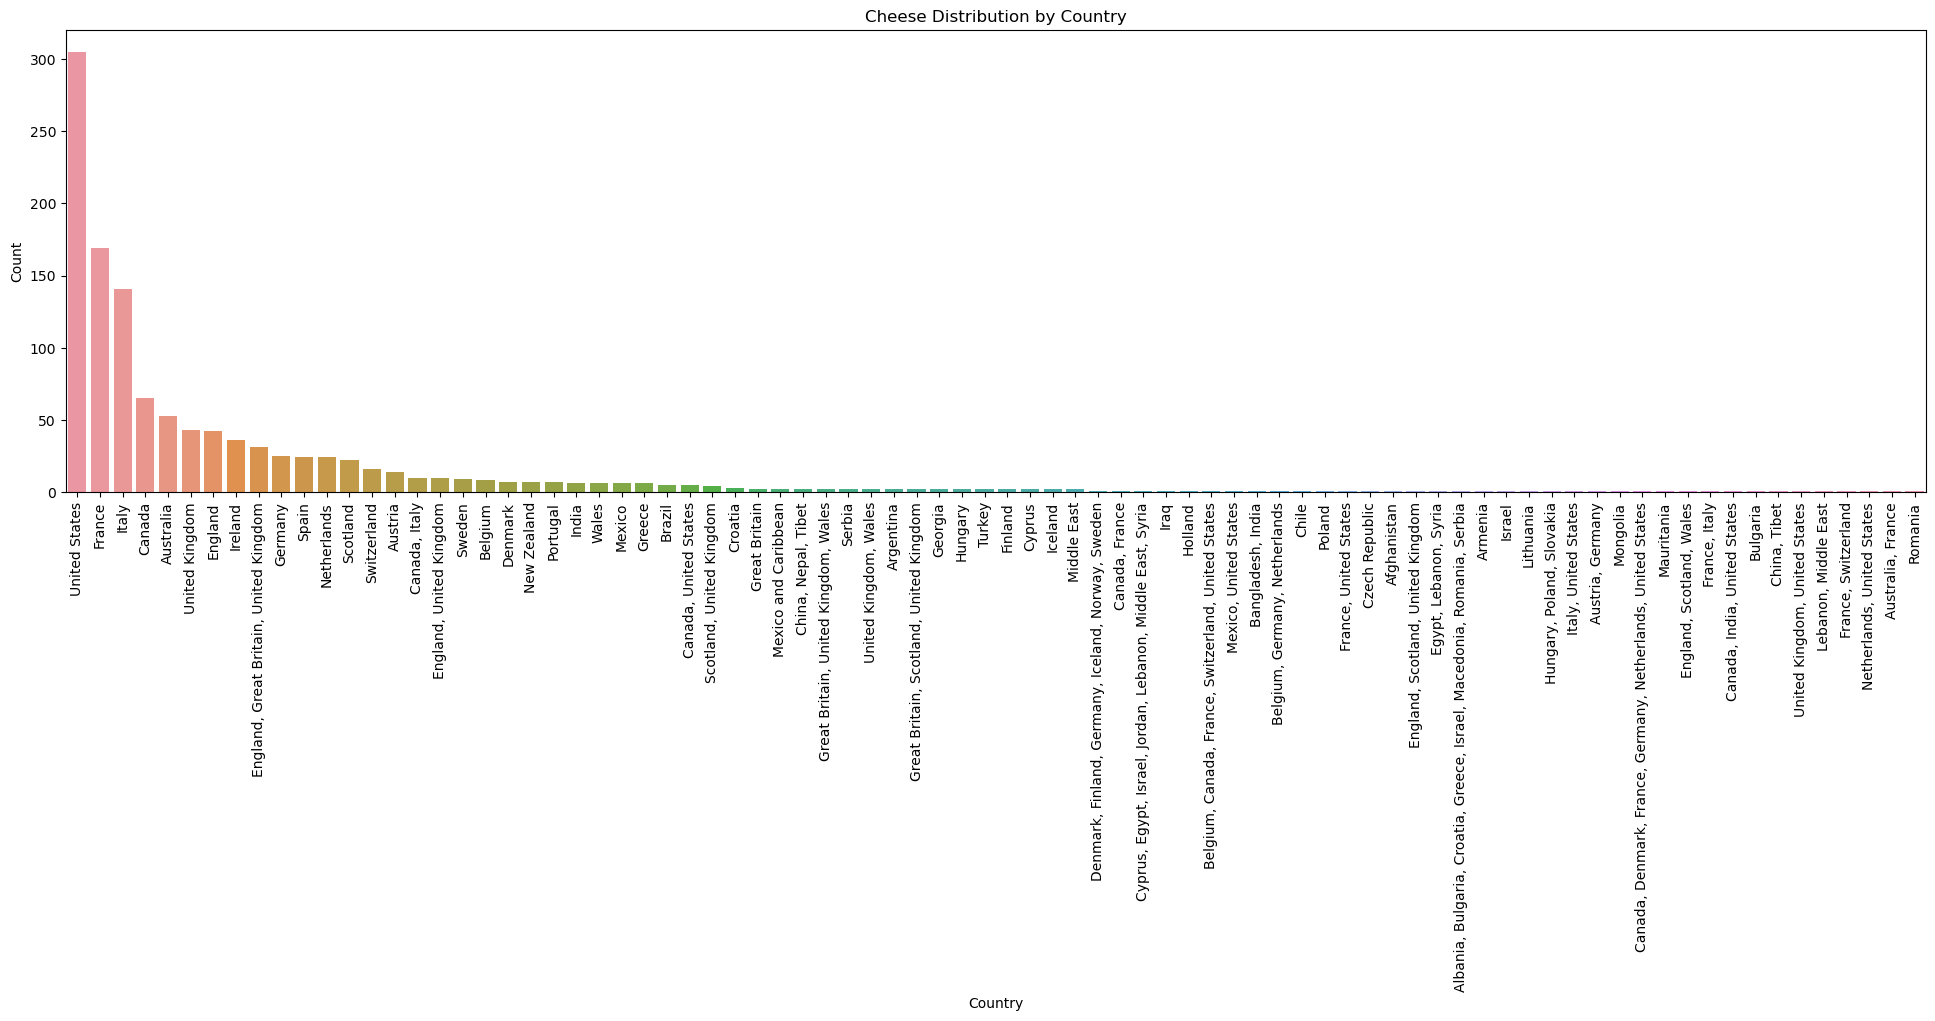

In [13]:
# Visualizing Cheese Distribution by Country
plt.figure(figsize=(24, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Cheese Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

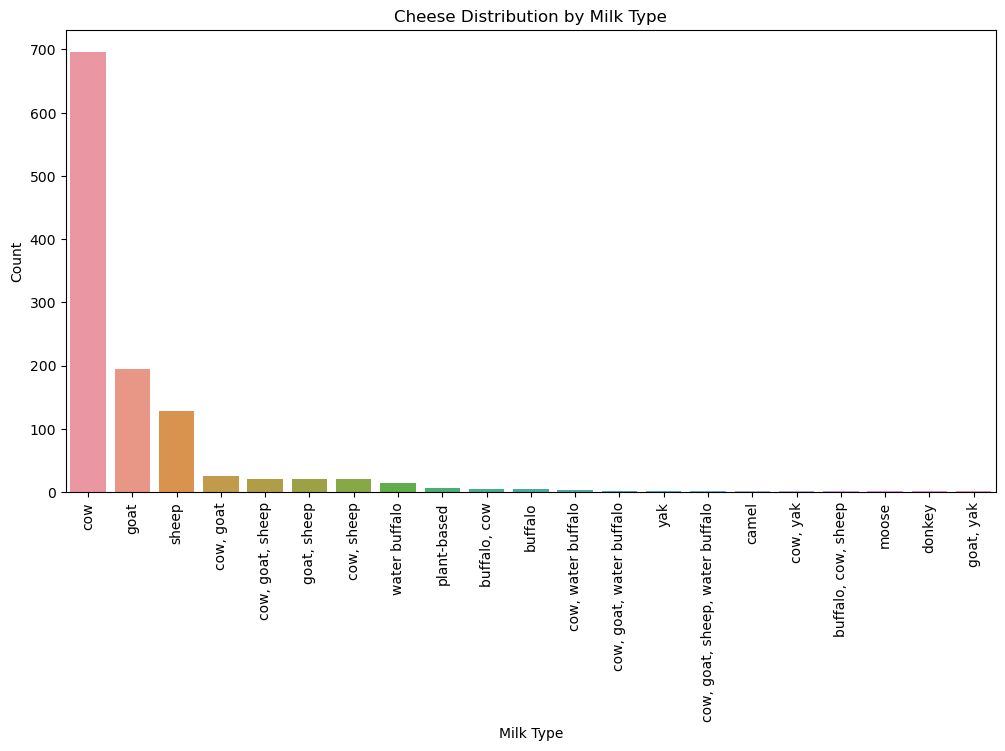

In [14]:
# Visualizing Cheese Distribution by Milk Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='milk', order=df['milk'].value_counts().index)
plt.title('Cheese Distribution by Milk Type')
plt.xlabel('Milk Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

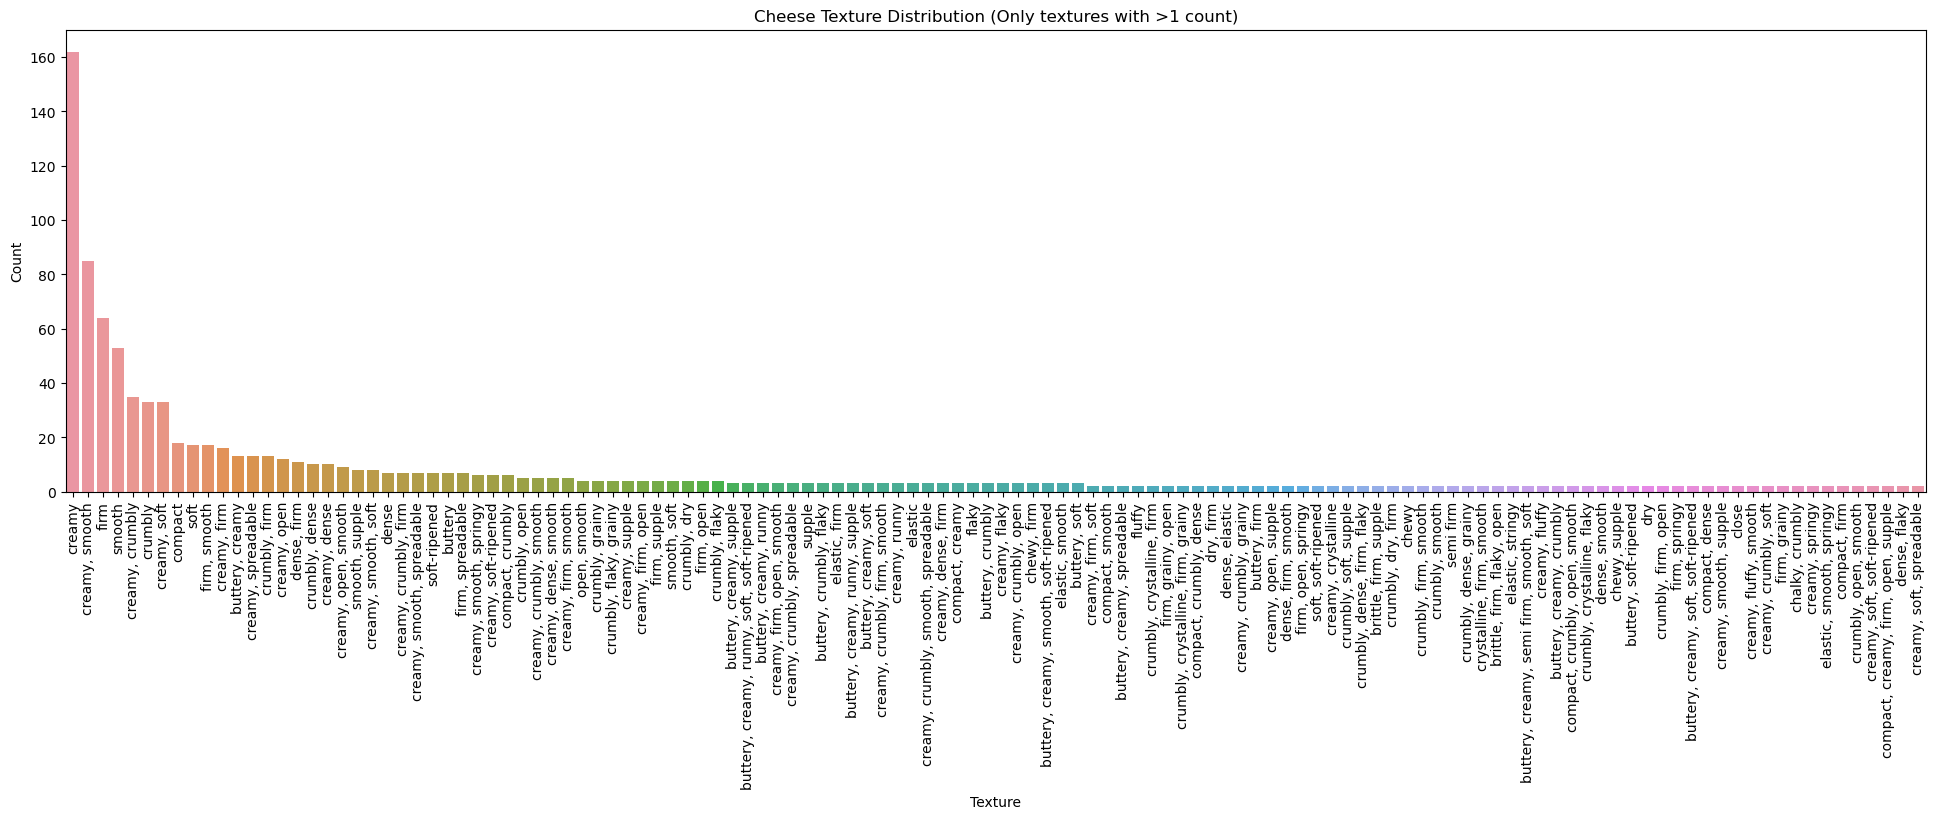

In [15]:
texture_counts = df['texture'].value_counts()
textures_to_include = texture_counts[texture_counts > 1].index

# Filter the dataframe
filtered_df = df[df['texture'].isin(textures_to_include)]

# Visualizing Cheese Texture Distribution for textures with more than one count
plt.figure(figsize=(24, 6))
sns.countplot(data=filtered_df, x='texture', order=filtered_df['texture'].value_counts().index)
plt.title('Cheese Texture Distribution (Only textures with >1 count)')
plt.xlabel('Texture')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


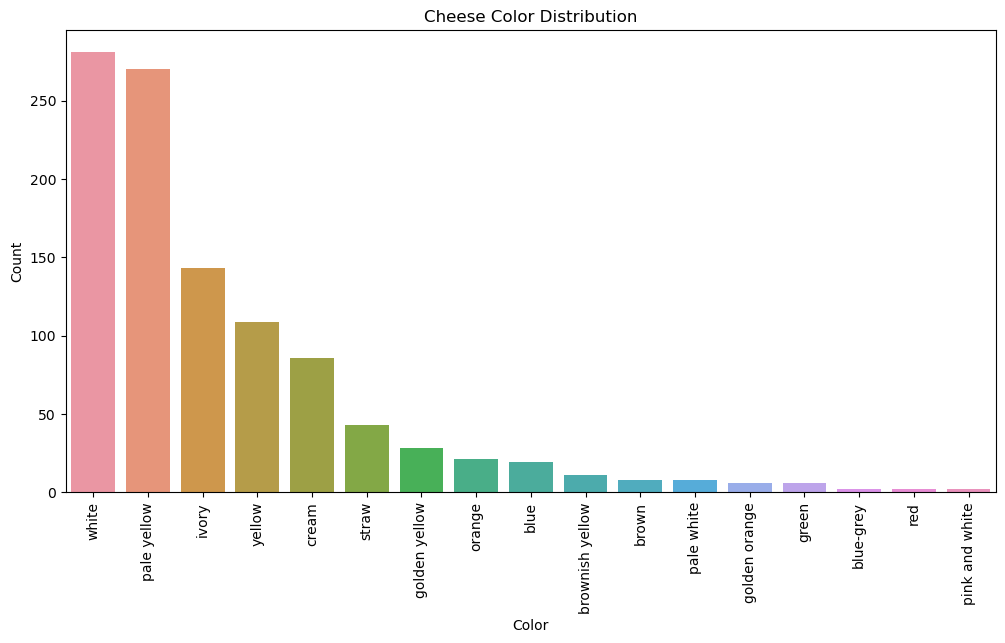

In [16]:
# Visualizing Cheese Color Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='color', order=df['color'].value_counts().index)
plt.title('Cheese Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

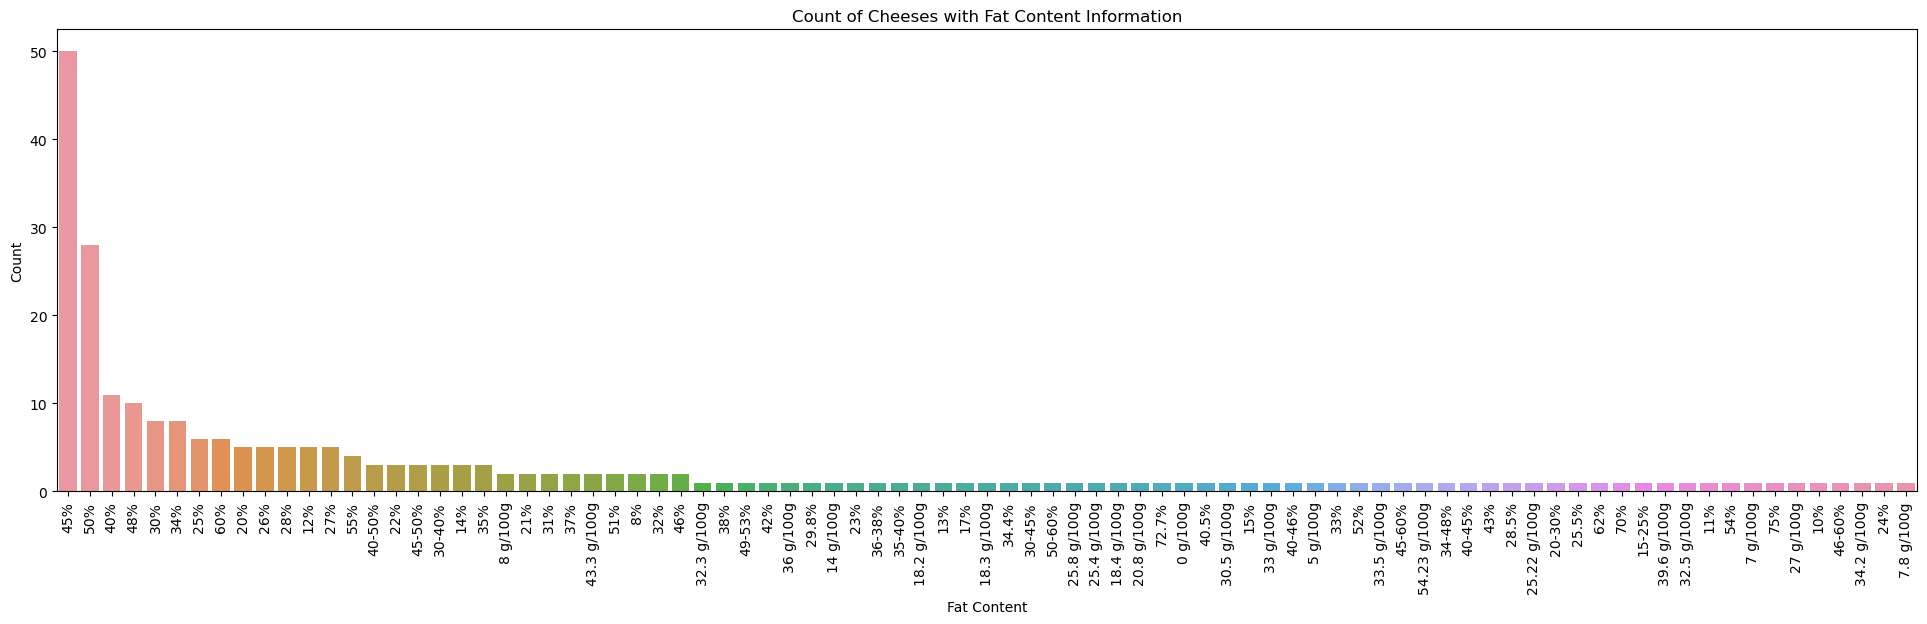

In [17]:
# Count of Cheeses with Fat Content Information
plt.figure(figsize=(24, 6))
sns.countplot(data=df, x='fat_content', order=df['fat_content'].value_counts().index)
plt.title('Count of Cheeses with Fat Content Information')
plt.xlabel('Fat Content')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [19]:
def my_func(x):
    x = str(x)
    if "-" in x:
        return str(x).split("-")[-1]
    else:
        return x
df['new_fat_content'] = df['fat_content'].apply(my_func)
df1 = df[df["fat_content"].notna()]

def my_fun(x):
    return x.replace('%', '')

df1['new_fat_content'] = df1['new_fat_content'].apply(my_fun)
df1['new_fat_content'].replace('33.5 g/100g', '33.5', inplace=True)
df1['new_fat_content'].replace('54.23 g/100g', '54.23', inplace=True)

def my_func1(x):
    x = str(x)
    if "g" in x:
        return x.split(" ")[0]
    else:
        return x
df1['new_fat_content'] = df1["new_fat_content"].apply(my_func1)

df1['new_fat_content'] = df1['new_fat_content'].astype('float')

C:\Users\Megmi\AppData\Local\Temp\ipykernel_9064\230306537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_fat_content'] = df1['new_fat_content'].apply(my_fun)
C:\Users\Megmi\AppData\Local\Temp\ipykernel_9064\230306537.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df

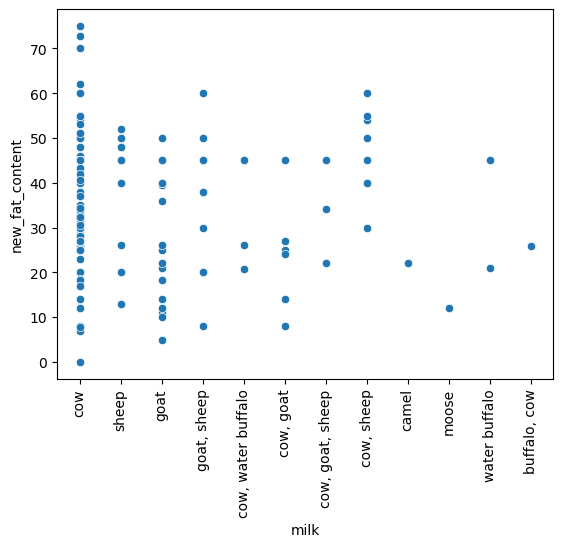

In [20]:
ax = sns.scatterplot(x="milk", y="new_fat_content", data=df1);
ax.set_title = ("Milk vs. Fat Content")
#plt.yticks([5, 10, 15, 20, 25, 30, 35, 40])
plt.xticks(rotation=90)
plt.show()